In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
meta_train = pd.read_csv('data/meta_train_clean.csv')
meta_segmentation = pd.read_csv('data/meta_segmentation_clean.csv')
train_segmented = pd.read_csv('data/train_segmented.csv')

In [3]:
print("meta_train")
print(meta_train.head(3))
print(meta_train.columns)

print("\n\nmeta_segmentation")
print(meta_segmentation.head(3))
print(meta_segmentation.columns)

print("\n\n\train_segmented")
print(train_segmented.head(3))
print(train_segmented.columns)

meta_train
            StudyInstanceUID  Slice  ImageHeight  ImageWidth  SliceThickness  \
0  1.2.826.0.1.3680043.10001      1          512         512           0.625   
1  1.2.826.0.1.3680043.10001      2          512         512           0.625   
2  1.2.826.0.1.3680043.10001      3          512         512           0.625   

   ImagePositionPatient_x  ImagePositionPatient_y  ImagePositionPatient_z  
0                 -52.308                 -27.712                   7.282  
1                 -52.308                 -27.712                   6.657  
2                 -52.308                 -27.712                   6.032  
Index(['StudyInstanceUID', 'Slice', 'ImageHeight', 'ImageWidth',
       'SliceThickness', 'ImagePositionPatient_x', 'ImagePositionPatient_y',
       'ImagePositionPatient_z'],
      dtype='object')


meta_segmentation
            StudyInstanceUID  Slice  ImageHeight  ImageWidth  SliceThickness  \
0  1.2.826.0.1.3680043.10633      1          512         512      

Shape of dataset: (711601, 8)
Data Types:
StudyInstanceUID           object
Slice                       int64
ImageHeight                 int64
ImageWidth                  int64
SliceThickness            float64
ImagePositionPatient_x    float64
ImagePositionPatient_y    float64
ImagePositionPatient_z    float64
dtype: object
Missing Values:
StudyInstanceUID          0
Slice                     0
ImageHeight               0
ImageWidth                0
SliceThickness            0
ImagePositionPatient_x    0
ImagePositionPatient_y    0
ImagePositionPatient_z    0
dtype: int64
Descriptive Statistics:
                Slice    ImageHeight     ImageWidth  SliceThickness  \
count  711601.000000  711601.000000  711601.000000   711601.000000   
mean      201.459901     512.281326     512.283736        0.698152   
std       143.653159       8.481772       8.482687        0.175604   
min         1.000000     512.000000     512.000000        0.488281   
25%        89.000000     512.000000     512.

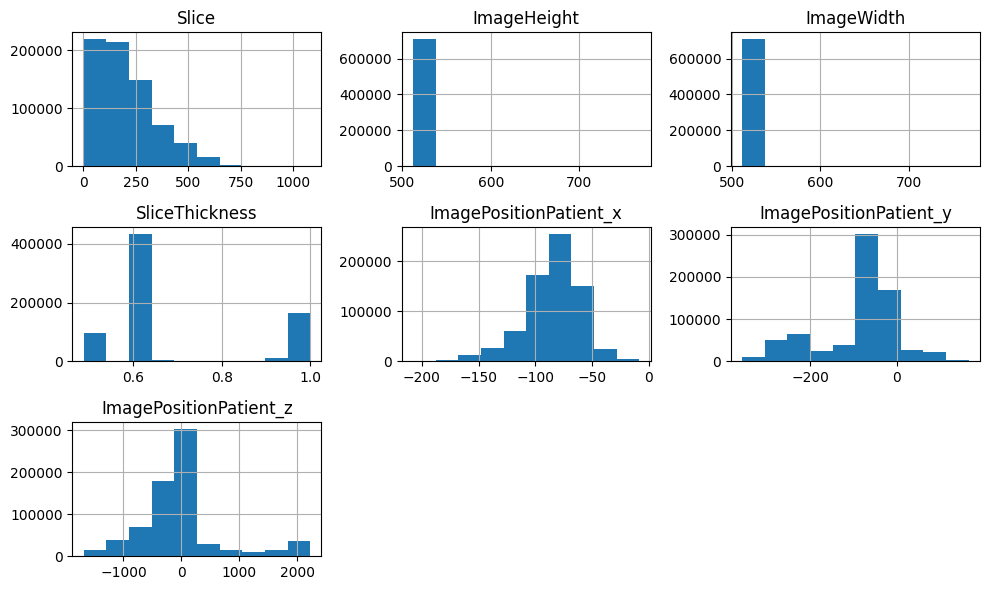

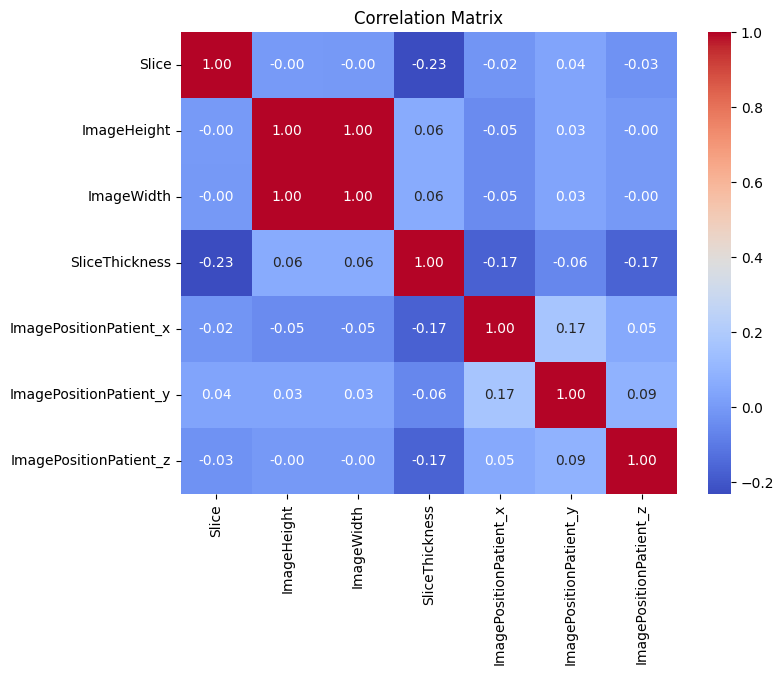

Shape of dataset: (29832, 15)
Data Types:
StudyInstanceUID           object
Slice                       int64
ImageHeight                 int64
ImageWidth                  int64
SliceThickness            float64
ImagePositionPatient_x    float64
ImagePositionPatient_y    float64
ImagePositionPatient_z    float64
C1                          int64
C2                          int64
C3                          int64
C4                          int64
C5                          int64
C6                          int64
C7                          int64
dtype: object
Missing Values:
StudyInstanceUID          0
Slice                     0
ImageHeight               0
ImageWidth                0
SliceThickness            0
ImagePositionPatient_x    0
ImagePositionPatient_y    0
ImagePositionPatient_z    0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        

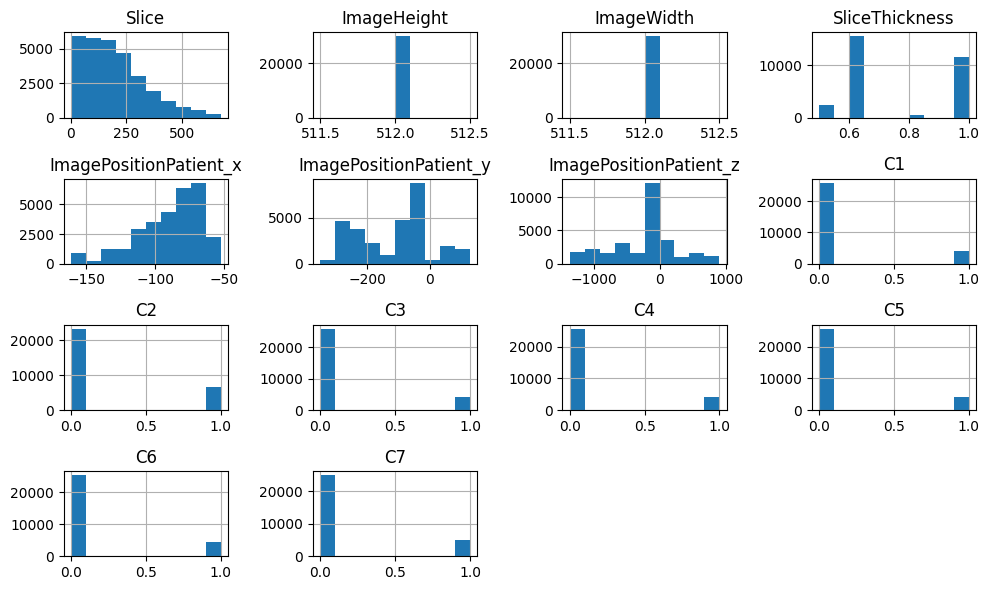

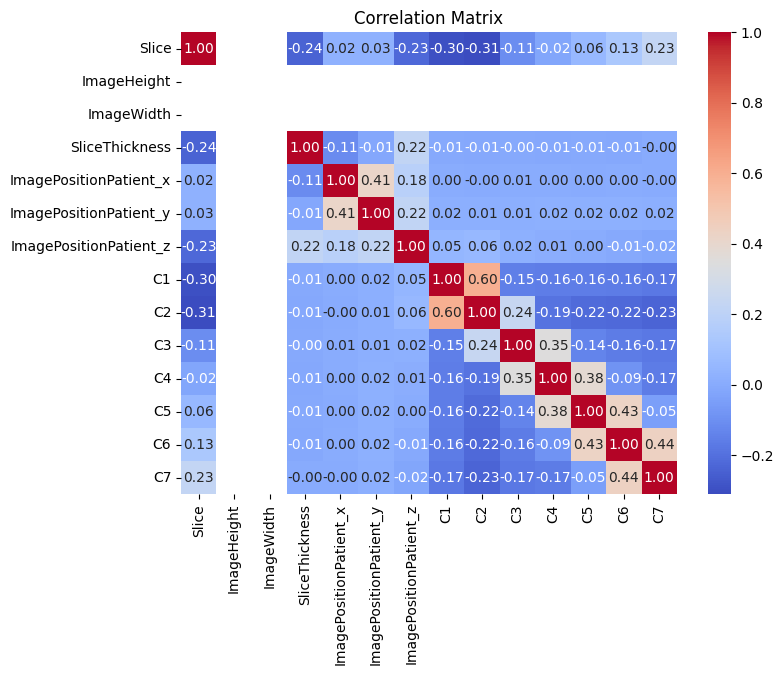

Shape of dataset: (711601, 15)
Data Types:
StudyInstanceUID           object
Slice                       int64
ImageHeight                 int64
ImageWidth                  int64
SliceThickness            float64
ImagePositionPatient_x    float64
ImagePositionPatient_y    float64
ImagePositionPatient_z    float64
C1                        float64
C2                        float64
C3                        float64
C4                        float64
C5                        float64
C6                        float64
C7                        float64
dtype: object
Missing Values:
StudyInstanceUID          0
Slice                     0
ImageHeight               0
ImageWidth                0
SliceThickness            0
ImagePositionPatient_x    0
ImagePositionPatient_y    0
ImagePositionPatient_z    0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                       

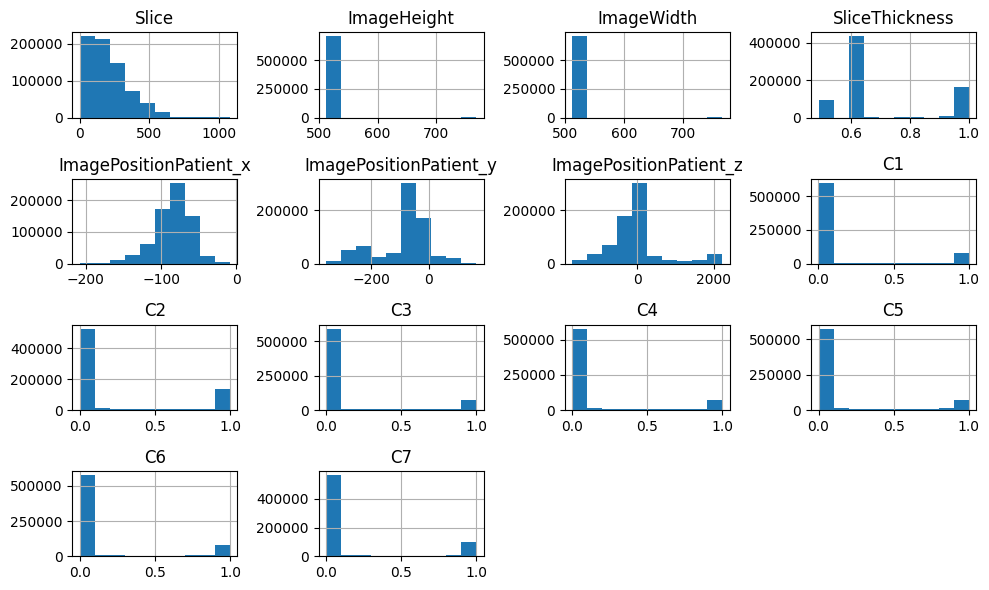

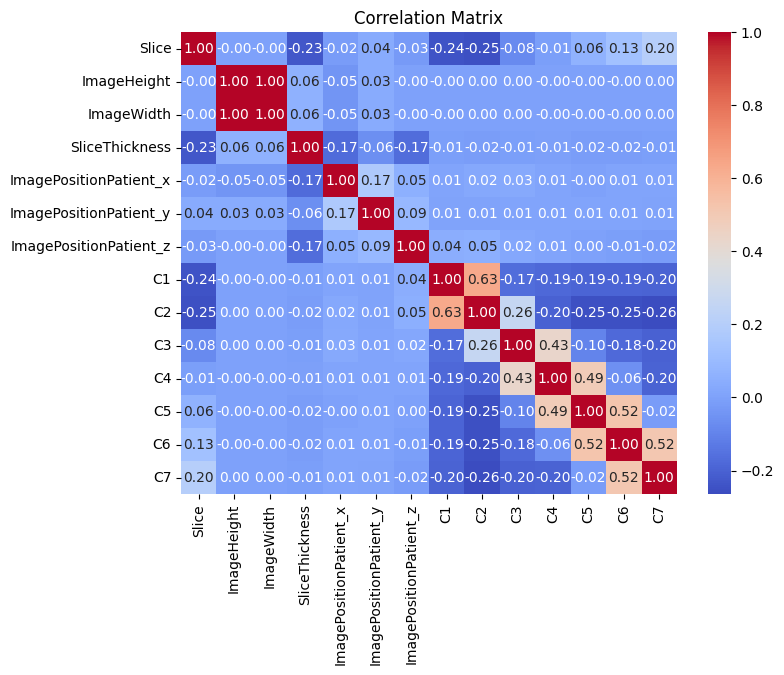

In [6]:
# Meta_train EDA
"""Histograms and other plots aren't meant to explain anything only to find missing data, potential faults & potential anomolies"""

def eda(data):  
    df = pd.DataFrame(data)

    # Gen. structure
    print(f"Shape of dataset: {df.shape}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Missing Values:\n{df.isnull().sum()}")

    # Descript. statistics
    print("Descriptive Statistics:\n", df.describe())

    # Histograms
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if len(numeric_columns) > 0:
        df[numeric_columns].hist(bins=10, figsize=(10, 6))
        plt.tight_layout()
        plt.show()
    else:
        print("No numeric columns available for histograms.")

    # Correlation matrix
    if len(numeric_columns) > 1:
        correlation = df[numeric_columns].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Matrix")
        plt.show()
    else:
        print("Not enough numeric columns for a correlation matrix.")

eda(meta_train)
eda(meta_segmentation)
eda(train_segmented)